# Flight Data Exploration 
## By: Mohamed Ahmed Rashwan

## Introduction

In this project we will explore patterns and relationships related to flight cancellations and delays as they pertain to different airlines and airports. We begin with data gathering and basic exploration, then proceed to data cleaning and the heart of the project are the visual exploration and visual explantion sections. In the explanatory visualization section we view this information from the perspective of a travel insurance company.

The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. To make sure not overwhelmed by the size of the data,The data was separated by year. 
We decided to explore only the flights on 2008 because it was the nearest year that contained a full data files.

- A flight is considered delayed when it arrived 15 or more minutes than the schedule (see definitions in Frequently Asked Questions). Delayed minutes are calculated for delayed flights only.
- When multiple causes are assigned to one delayed flight, each cause is prorated based on delayed minutes it is responsible for. The displayed numbers are rounded and may not add up to the total.


### This dataset is composed by the following variables:

1. **Year** 2008

2. **Month** 1-12

3. **DayofMonth** 1-31

4. **DayOfWeek** 1 (Monday) - 7 (Sunday)
5. **DepTime** actual departure time (local, hhmm)
6. **CRSDepTime** scheduled departure time (local, hhmm)
7. **ArrTime** actual arrival time (local, hhmm)
8. **CRSArrTime** scheduled arrival time (local, hhmm)
9. **UniqueCarrier** unique carrier code
10. **FlightNum** flight number
11. **TailNum** plane tail number: aircraft registration, unique aircraft identifier
12. **ActualElapsedTime** in minutes
13. **CRSElapsedTime** in minutes
14. **AirTime** in minutes
15. **ArrDelay** arrival delay, in minutes
16. **DepDelay** departure delay, in minutes
17. **Origin** origin IATA airport code
18. **Dest** destination IATA airport code
19. **Distance** in miles
20. **TaxiIn** taxi in time, in minutes
21. **TaxiOut** taxi out time in minutes
22. **Cancelled** was the flight cancelled
23. **CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24. **Diverted** 1 = yes, 0 = no
25. **CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. 
26. **WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27. **NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS).
28. **SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29. **LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. 

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline

pd.options.display.float_format = '{:,.0f}'.format   # we don't need the decimal numbers in our data frame
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# Reading the Data
flights = pd.read_csv('DelayedFlights.csv')
airlines = pd.read_csv('airlines.csv')
airports= pd.read_csv('airports.csv')
df2 = pd.read_csv('carriers.csv')

#Dropping the index column and the unnamed column
flights = flights.drop(flights.columns[0:1],axis=1)
flights.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,"2,003",1955,"2,211",2225,WN,335,...,4,8,0,N,0,nan,nan,nan,nan,nan
1,2008,1,3,4,754,735,"1,002",1000,WN,3231,...,5,10,0,N,0,nan,nan,nan,nan,nan
2,2008,1,3,4,628,620,804,750,WN,448,...,3,17,0,N,0,nan,nan,nan,nan,nan
3,2008,1,3,4,"1,829",1755,"1,959",1925,WN,3920,...,3,10,0,N,0,2,0,0,0,32
4,2008,1,3,4,"1,940",1915,"2,121",2110,WN,378,...,4,10,0,N,0,nan,nan,nan,nan,nan


## Data Pre-Processing

### Missing values imputation
Here, we checked the numerical columns for missing values using the (is.na.sum) function and imputed them using the (linear interpolate function). The following columns had missing values which were handled: ArrTime, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay.

In [6]:
#Checking for null values
flights.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
#Null value Imputation using Interpolation Method
flights['DepTime']=flights['DepTime'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['ArrTime']=flights['ArrTime'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['DepTime']=flights['DepTime'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['ActualElapsedTime']=flights['ActualElapsedTime'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['CRSElapsedTime']=flights['CRSElapsedTime'].interpolate(method='linear',limit_direction ='both',axis=0)
flights['AirTime']=flights['AirTime'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['ArrDelay']=flights['ArrDelay'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['DepDelay']=flights['DepDelay'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['TaxiIn']=flights['TaxiIn'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['TaxiOut']=flights['TaxiOut'].interpolate(method='linear',limit_direction ='both',axis=0)
flights['CarrierDelay']=flights['CarrierDelay'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['WeatherDelay']=flights['WeatherDelay'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['NASDelay']=flights['NASDelay'].interpolate(method='linear',limit_direction ='both',axis=0) 
flights['SecurityDelay']=flights['SecurityDelay'].interpolate(method='linear',limit_direction ='both',axis=0)
flights['LateAircraftDelay']=flights['LateAircraftDelay'].interpolate(method='linear',limit_direction ='both',axis=0)

In [8]:
#Checking for null values
flights.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              5
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [9]:
#Changing column names to make it more meaningful and usable in later stages
flights = flights.rename(columns={'Year':'year','Month':'month','DayofMonth':'day_of_month','DayOfWeek':'day_of_week',
                        'DepTime':'actual_dep_time','CRSDepTime':'crs_dep_time','ArrTime':'actual_arr_time',
                        'CRSArrTime':'crs_arr_time','UniqueCarrier':'unique_carrier_code','FlightNum':'flight_number',
                        'TailNum':'tail_number','ActualElapsedTime':'actual_elapsed_time','CRSElapsedTime':'crs_elapsed_time',
                        'AirTime':'flight_time','ArrDelay':'arrival_delay','DepDelay':'departure_delay','Origin':'origin',
                        'Dest':'destination','Distance':'distance','TaxiIn':'taxi_in_time','TaxiOut':'taxi_out_time',
                        'Cancelled':'cancelled','CancellationCode':'cancellation_code','Diverted':'diverted',
                        'CarrierDelay':'carrier_delay','WeatherDelay':'weather_delay','NASDelay':'nas_delay',
                        'SecurityDelay':'security_delay','LateAircraftDelay':'late_aircraft_delay'})

In [10]:
flights.head(5)

,year,month,day_of_month,day_of_week,actual_dep_time,crs_dep_time,actual_arr_time,crs_arr_time,unique_carrier_code,flight_number,...,taxi_in_time,taxi_out_time,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2008,1,3,4,"2,003",1955,"2,211",2225,WN,335,...,4,8,0,N,0,2,0,0,0,32
1,2008,1,3,4,754,735,"1,002",1000,WN,3231,...,5,10,0,N,0,2,0,0,0,32
2,2008,1,3,4,628,620,804,750,WN,448,...,3,17,0,N,0,2,0,0,0,32
3,2008,1,3,4,"1,829",1755,"1,959",1925,WN,3920,...,3,10,0,N,0,2,0,0,0,32
4,2008,1,3,4,"1,940",1915,"2,121",2110,WN,378,...,4,10,0,N,0,6,0,0,0,40


## Data Exploration

The dataset columns were explored using univariate, bivariate and Multivariate visualisations. For the purpose of this report, only significant variables, relationships and their explorations have been discussed below.

## Univariate Exploration

### Univariate Distribution of Categorical Variables

In [265]:
# creating new variables and renaming 
flights['DepDate'] = pd.to_datetime(flights.year*10000+flights.month*100+flights.day_of_month,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flights:
    flights.loc[flights['arrival_delay'] <= 15, 'Status'] = 'On Time'
    flights.loc[flights['arrival_delay'] >= 15, 'Status'] = 'Slightly Delayed'
    flights.loc[flights['arrival_delay'] >= 60, 'Status'] = 'Highly Delayed'
    flights.loc[flights['diverted'] == 1, 'Status'] = 'Diverted'
    flights.loc[flights['cancelled'] == 1, 'Status'] = 'Cancelled'

### What is the Distribution of Delayed, Cancelled and Diverted flights?

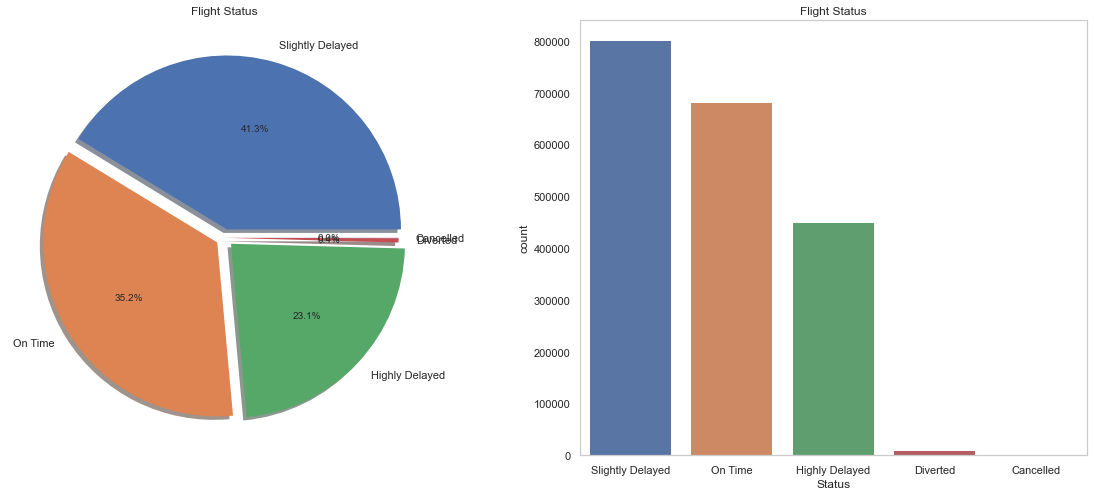

In [266]:
Base_color=sb.color_palette()[0]
f,ax=plt.subplots(1,2,figsize=(20,8))
flights['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Flight Status')
ax[0].set_ylabel('')
sb.countplot('Status',order = flights['Status'].value_counts().index, data=flights,ax=ax[1])
ax[1].set_title('Flight Status')
ax[0].set_xlabel('')
plt.show()

In [267]:
# Let's define a function for labelling bar charts
def chart_labels (x_label,y_label,title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

### Which cancellation reason is most common?

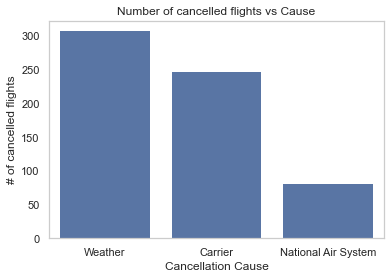

In [268]:
Base_color=sb.color_palette()[0]
canc = sb.countplot(data=flights[flights['cancelled']==1],x='cancellation_code',order=['B','A','C'],color=Base_color);
chart_labels('Cancellation Cause','# of cancelled flights','Number of cancelled flights vs Cause')
canc.set_xticklabels(['Weather','Carrier','National Air System']);

From the graph above, it is clear that **'A' (Carrier)** and **'B' (Weather)** are the highest reasons for flight cancellations.

## Which carrier had the most cancellations?
Once we have looked at the top reasons for cancellations, we can move on to see which carrier had the most cancellations. This can be observed by a bar plot for carrier codes for which flights were cancelled.

In [269]:
#Getting a subset of original dataframe that contains only cancellation date
df_data_sub=flights.query('cancellation_code in ["A","B","C"]')

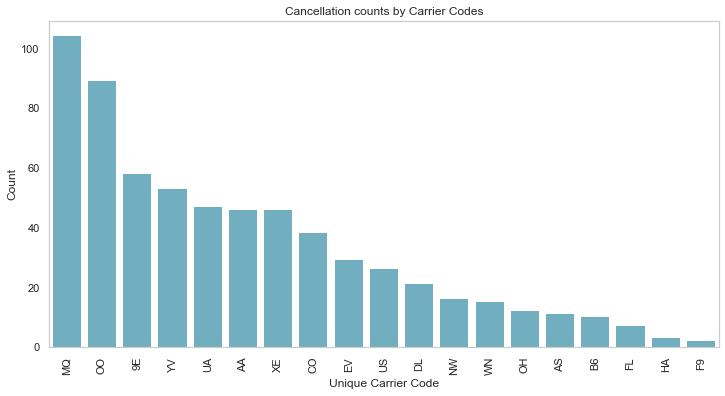

In [270]:
#Getting distribution of carriers that had most cancellations

#Saving value counts for various carriers 
carriers_cancellations=df_data_sub.unique_carrier_code.value_counts()

#Define Plot
base_color=sb.color_palette()[9]
plt.figure(figsize=(12,6))
g=sb.countplot(data=df_data_sub,x='unique_carrier_code',color=base_color,order=carriers_cancellations.index)
g.set_xticklabels(labels=carriers_cancellations.index,rotation=90)
chart_labels('Unique Carrier Code','Count','Cancellation counts by Carrier Codes')

The plot above shows that **MQ(Envoy Air) and OO(SkyWest Airlines)** are the top carriers with highest cancellations. These cancellations include all three types (A,B,C).

In [271]:
#Creating a function to plot Count plot
def count_plot(flights,feature):
    sb.set(color_codes = 'Blue', style="whitegrid")
    sb.set_style("whitegrid", {'axes.grid' : False})
    sb.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(14,4))
    sb.countplot(x=feature, data=flights, color = 'steelblue') # countplot
    plt.show()

### Which month, day of month and day of the week had the highst number of flights?

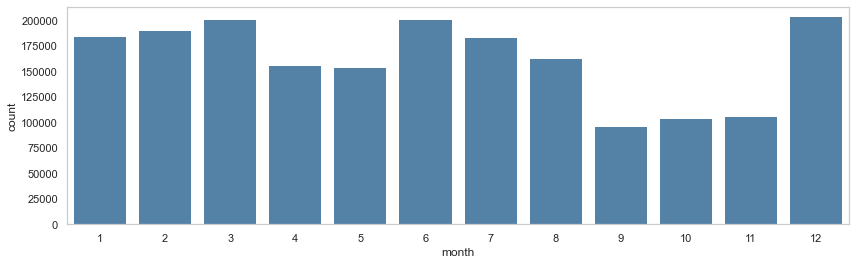

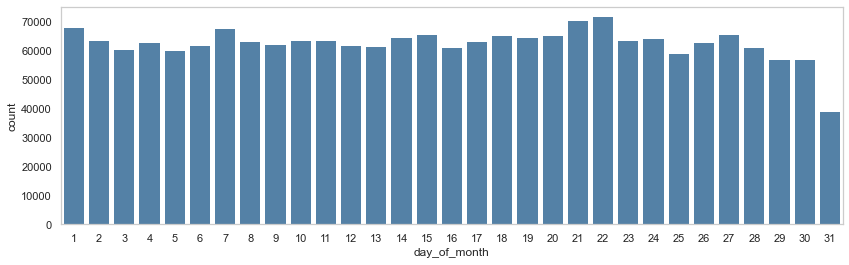

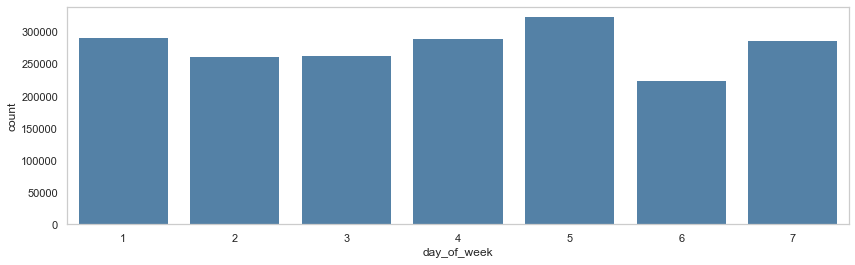

In [272]:
cat_cols=['month','day_of_month','day_of_week']

for col in cat_cols:
    if col in ['month','day_of_month','day_of_week']:
        count_plot(flights,col)

### Univariate Distribution of Numerical Variables

In [273]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(flights,feature, fig_num):
    sb.set(color_codes = 'Blue', style="whitegrid")
    sb.set_style("whitegrid", {'axes.grid' : False})
    sb.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4))
    filtered = flights.loc[~np.isnan(flights[feature]), feature]
    sb.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sb.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()

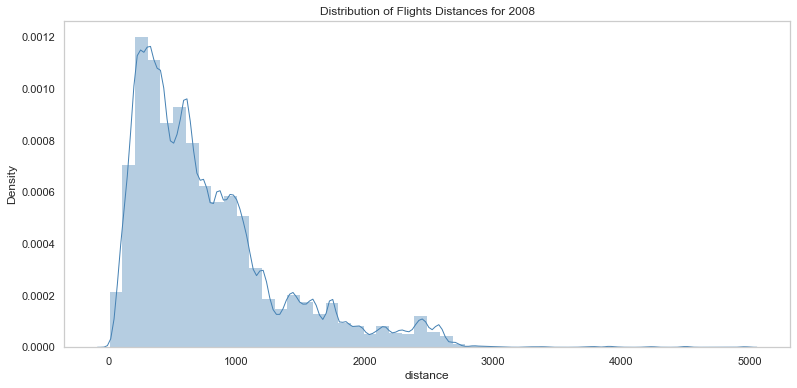

In [12]:
plt.figure(figsize=(13,6))
plt.title('Distribution of Flights Distances for 2008')
sb.set(color_codes = 'Blue', style="whitegrid")
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set_context(rc = {'patch.linewidth': 0.0})
filtered = flights.loc[~np.isnan(flights['distance']), 'distance']
sb.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue') # histogram
plt.show()

From this figure, we can see that the distribution of distances is a **Right Skewed Distribution** with some outlies with very high distaces.This means that most of the flights are small in distances.

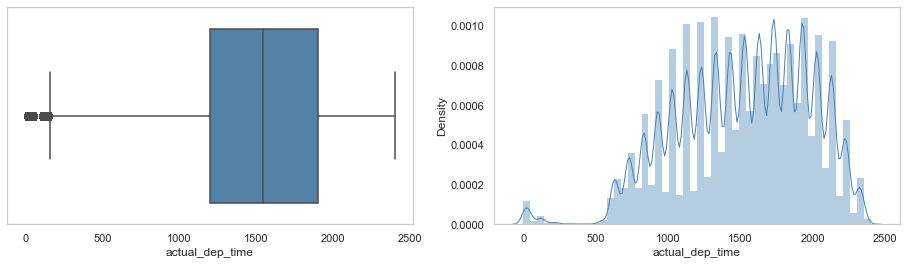

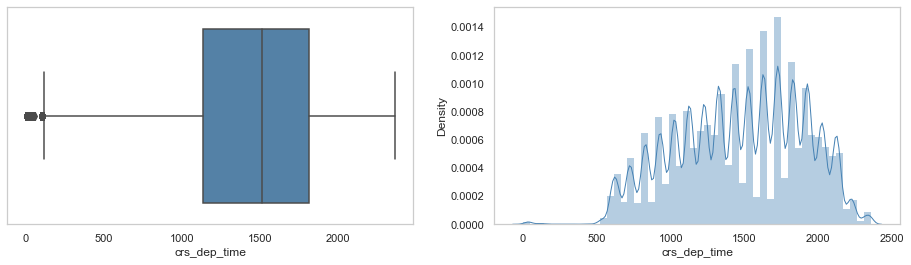

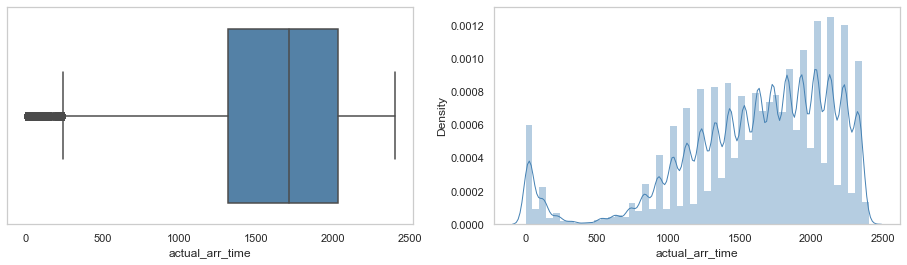

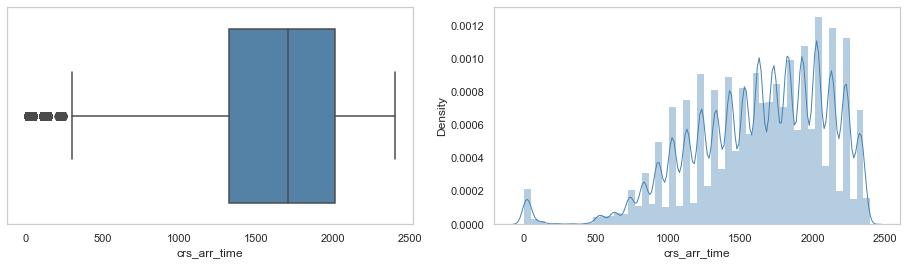

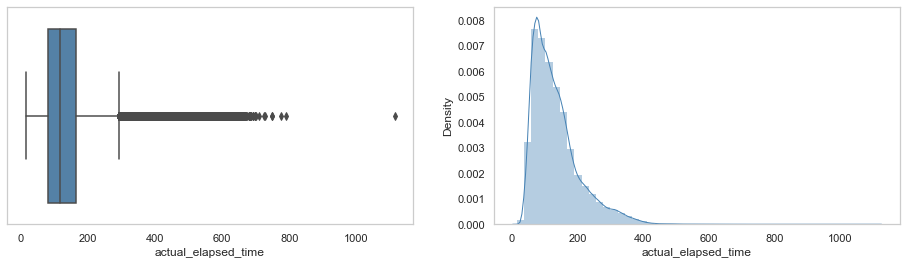

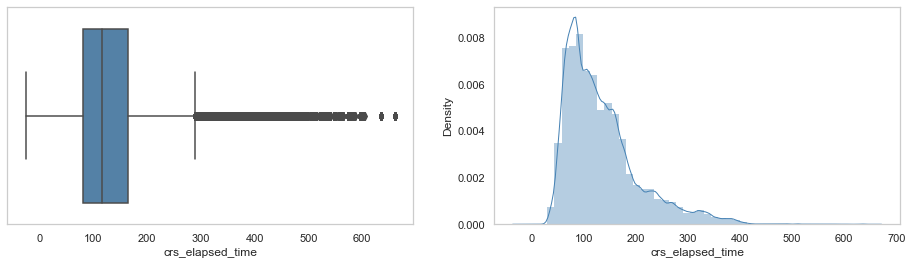

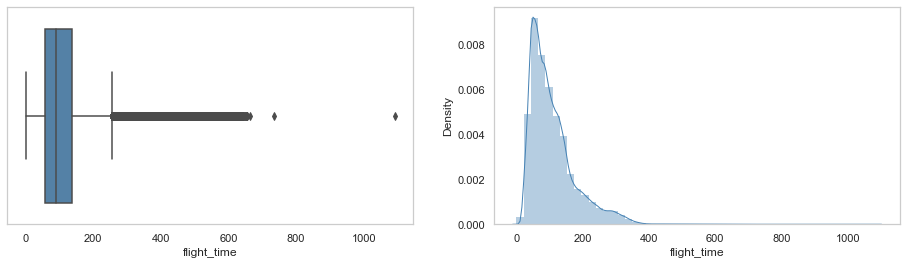

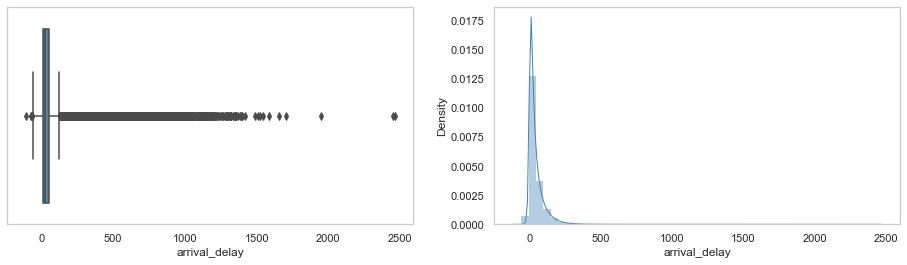

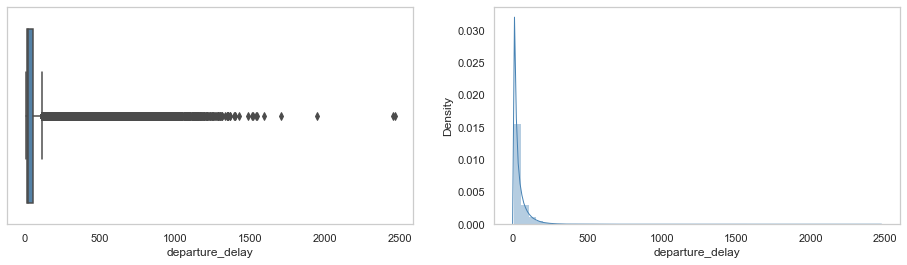

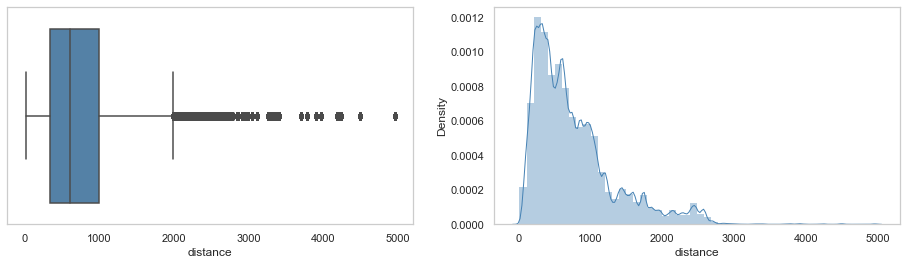

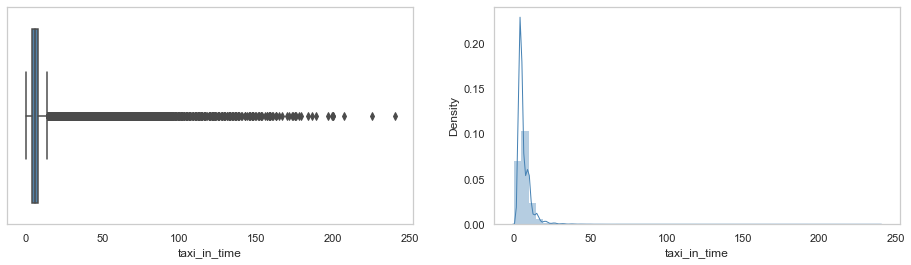

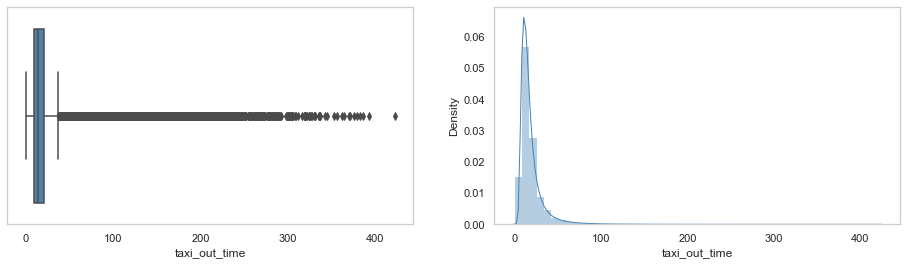

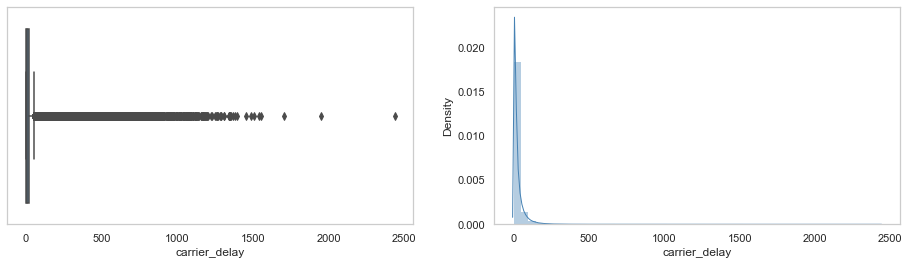

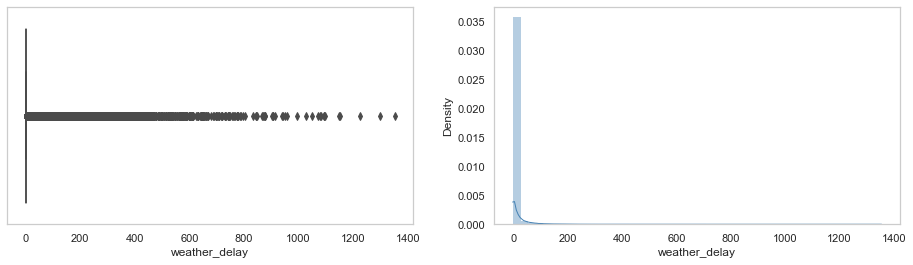

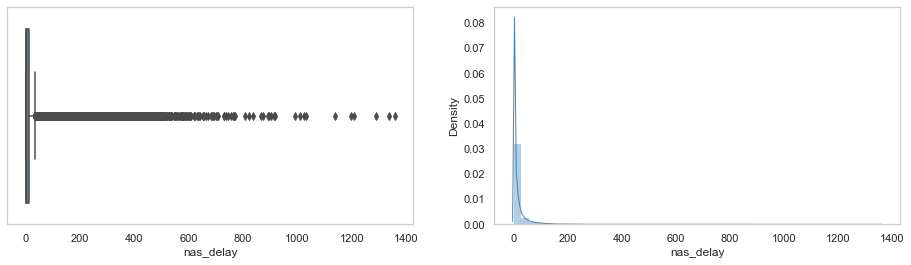

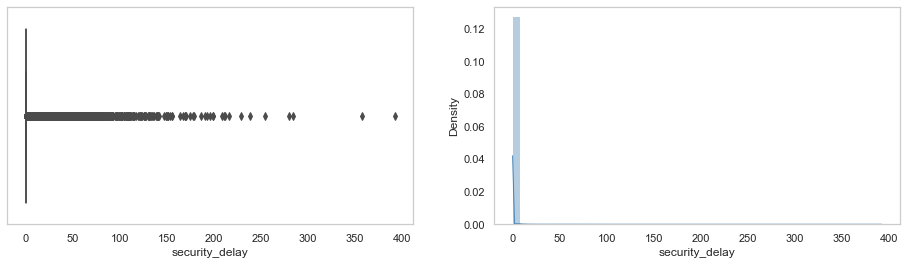

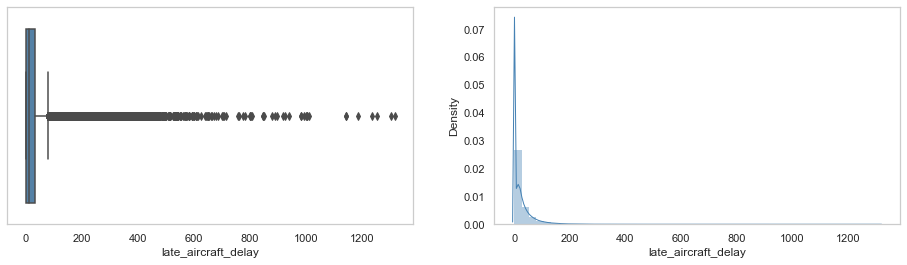

In [275]:
fig_num = 1  
for col in flights.select_dtypes(include=[np.number]).columns:
    if col in ['actual_dep_time','crs_dep_time','actual_arr_time','crs_arr_time','actual_elapsed_time','crs_elapsed_time','flight_time','arrival_delay','departure_delay','distance','taxi_in_time','taxi_out_time','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']:
        hist_box_plot(flights,col, fig_num)
        fig_num = fig_num + 1

## Bivariate Exploration

### What does each carrier's performance looks like in terms on on time arrivals?

Lets prepare a stacked bar chart that shows each carrier's on time performance.

We will use "arrival_delay" for this calculation. the flights that have **arrival_delays>0** were considered delayed. We will get the proportion of flights (for each carrier) that made it on time.

In [276]:
#Filtering only data with arrival_delay information, excluding NaN
df_depart_delay=flights[flights['departure_delay'].notnull()]

In [277]:
#Getting a dataframe with number of flights that were delayed and not cancelled by each carrier
arrival_delayed=df_depart_delay.query('cancelled==0 & arrival_delay>0').groupby('unique_carrier_code').size().reset_index(name='delayed_flights')

In [278]:
#Getting a dataframe with number of total flights that took off (not cancelled)
uncancelled_flights=flights.query('cancelled==0').groupby('unique_carrier_code').size().reset_index(name='total_flights')

In [279]:
#Merging both dataframes on unique_carrier_code
df_merged_delay=pd.merge(arrival_delayed,uncancelled_flights,on='unique_carrier_code')

In [280]:
#Calculating the percentage of delayed flights
df_merged_delay['delayed_percent']=df_merged_delay['delayed_flights']/df_merged_delay['total_flights']*100

In [281]:
#Creating a new column on time percentage
df_merged_delay['on_time_percent']=100-df_merged_delay.delayed_percent
df_merged_delay=df_merged_delay.sort_values(by='delayed_percent',ascending=False)

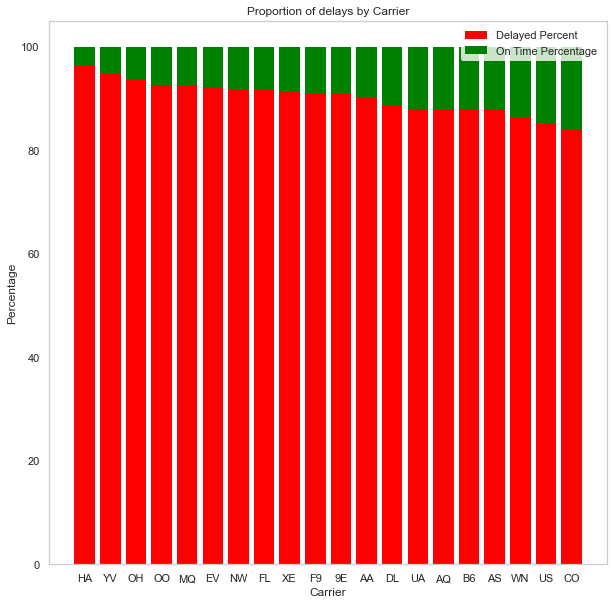

In [293]:
#Define plot
plt.figure(figsize=(10,10))
plt.bar(data=df_merged_delay,x='unique_carrier_code',height='on_time_percent',color='green',bottom=df_merged_delay.delayed_percent)
plt.bar(data=df_merged_delay,x='unique_carrier_code',height='delayed_percent',color='red')
red_patch=mpatches.Patch(color='red',label='Delayed Percent')
green_patch=mpatches.Patch(color='green',label='On Time Percentage')
chart_labels('Carrier','Percentage','Proportion of delays by Carrier')
plt.legend(handles=[red_patch,green_patch]);
plt.show()

The red bars show delays as a percentage of total flights for each carrier. **The larger the red bar, The worse the performance.**

### What is the cancellation rate for each carrier?

In [328]:
# rename the Code and Description columns in carriers table to UniqueCarrier and CarrierDescription
df2.columns = ['UniqueCarrier', 'CarrierDescription']

flights_v1['CarrierDescription'] = flights_v1['CarrierDescription'].replace({'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)': 'US Airways Inc.'})

In [284]:
grouped_carrier_g = flights_v1.groupby(by=['CarrierDescription'])
proportional_cancellations_g = grouped_carrier_g['Cancelled'].sum() / grouped_carrier_g.size()
# proportional_cancellations_g

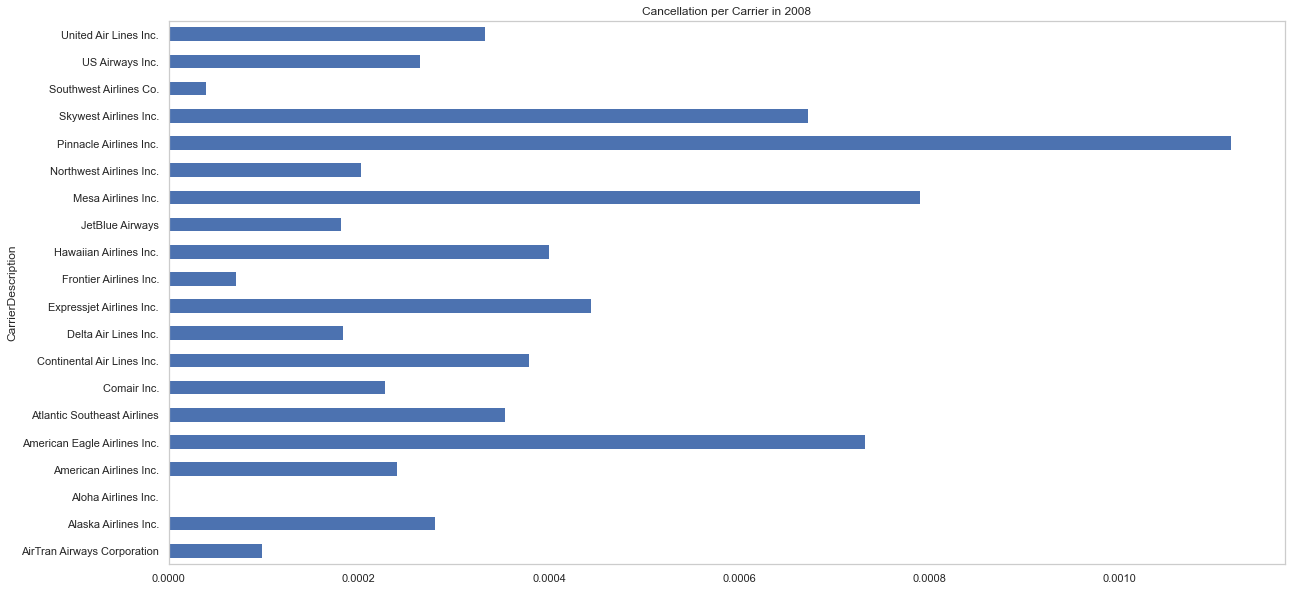

In [327]:
# visualization of cancellation rate per Carrier 
proportional_cancellations_g.plot(kind='barh', stacked=False, figsize=[20,10],title ="Cancellation per Carrier in 2008");

From the above Figure, We can see clearly that **Pinnacle Airlines Inc.** has the highst cancellation rate and **Aloha Airlines Inc.** has the lowest cancellation rate.

### What is the relationship between flight distances and mean arrival delay?

In [307]:
#Pandas series with average arrival delay by distance
distance_arrival=flights.query('arrival_delay>0').groupby('distance')['arrival_delay'].mean()

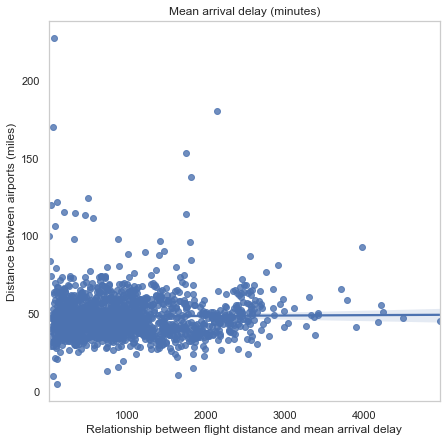

In [308]:
#Converting the series for seaborn plotting
plt.figure(figsize=(7,7))
x,y=pd.Series(distance_arrival.index,name='distance'),pd.Series(distance_arrival.values,name='avg_arrival_delay')
sb.regplot(x=x,y=y)
chart_labels('Relationship between flight distance and mean arrival delay','Distance between airports (miles)','Mean arrival delay (minutes)')

### What is the worst time of day to travel?

In [312]:
flights['CRSDepHour'] = pd.cut(flights.crs_dep_time, list(range(0, 2500, 100)))

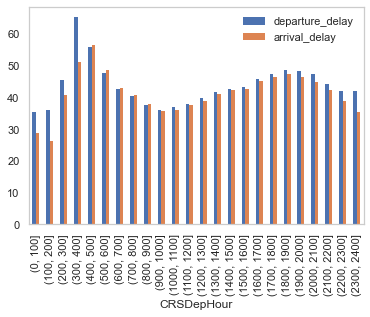

In [320]:
flights.groupby('CRSDepHour').agg({'departure_delay':'mean', 'arrival_delay':'mean'}).plot.bar();
plt.show();

## Multivariate Exploration

### Does the number of flights to destinations have an effect on arrival delays?

In [297]:
#Creating two series that groups by destination and gets number of flights and average arrival delay for each destination
group_destination=flights.groupby('destination').size().sort_values(ascending=False)
group_arrival=flights.groupby('destination')['arrival_delay'].mean()

In [298]:
#Create a dataframe of top 50 busiest airports and average arrival delays for each by destination
delay_destination=pd.concat([group_destination,group_arrival],axis=1).reset_index()
delay_destination.columns=['destination','flights','avg_arrival_delay']

In [299]:
#Sorting number of flight values by descending order (busiest destinations first)
delay_destination=delay_destination.sort_values('flights',ascending=False)

In [300]:
#Feature Engineering: Create a new column 'top_destinations' to create two groups: Top 50 and Rest
delay_destination['top_destinations']=np.nan

In [301]:
#Setting new column for top 50 
delay_destination.iloc[:50,3]='Rank 1-50'

In [302]:
#Setting new column for rest 
delay_destination.iloc[50:100,3]='Rank 51-100'

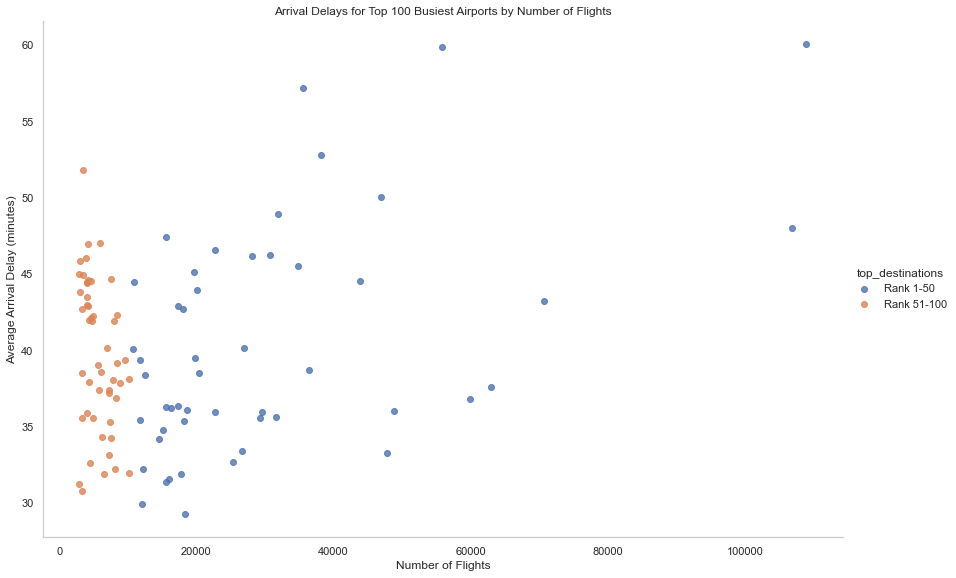

In [306]:
#Define scatter plot with color used for ranking 
g=sb.FacetGrid(data=delay_destination,hue='top_destinations',hue_order=['Rank 1-50','Rank 51-100'],size=8,aspect=1.5)
g=g.map(sb.regplot,'flights','avg_arrival_delay',x_jitter=0.4,fit_reg=False)
g.add_legend()
chart_labels('Number of Flights','Average Arrival Delay (minutes)','Arrival Delays for Top 100 Busiest Airports by Number of Flights')

The graph above shows that for the top 50 busiest destinations, the number of flights does have an effect on average arrival delay. This is not so much true for less busy airports that rank from 51-100.

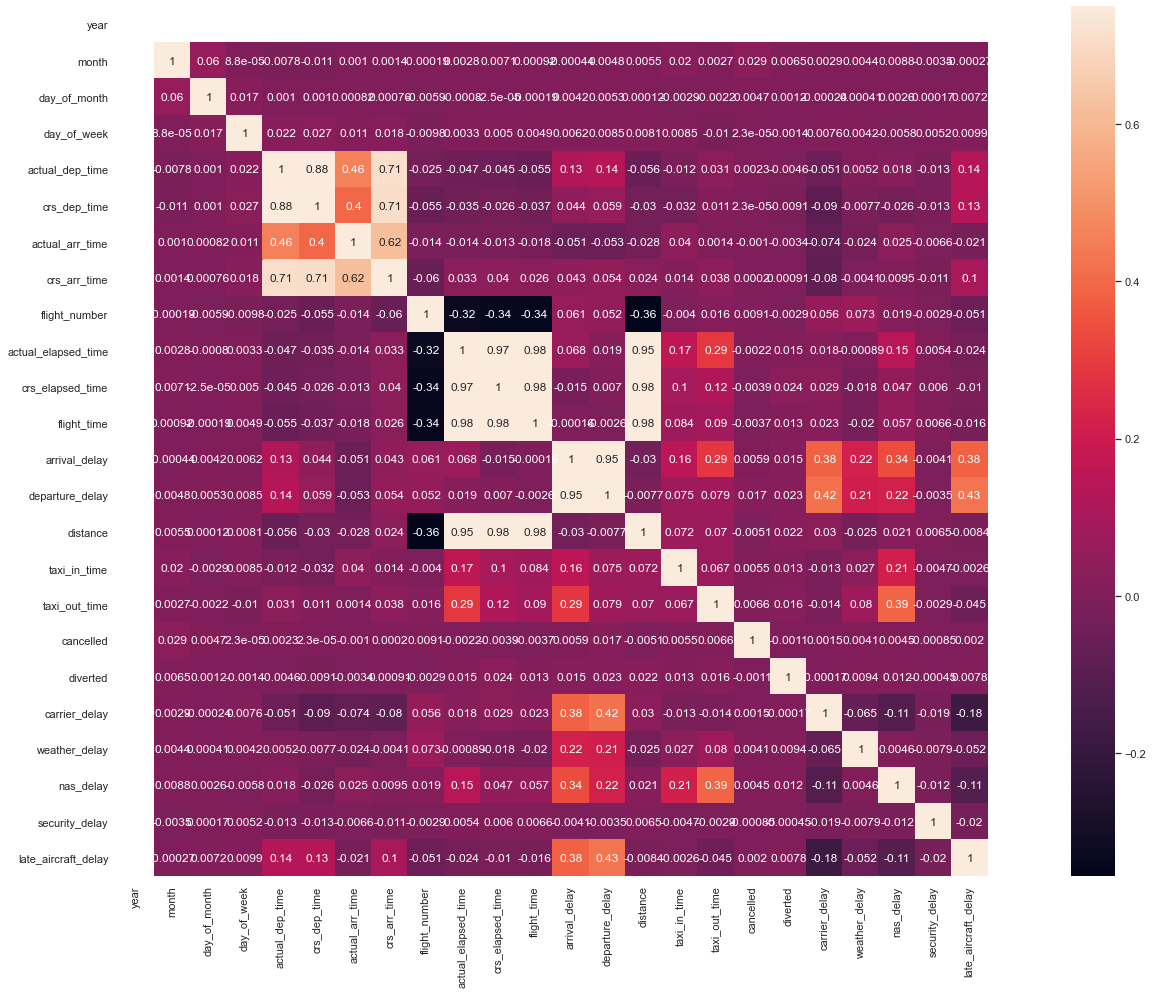

In [333]:
#correlation matrix
Correlation_r = flights.corr()
f, ax = plt.subplots(figsize=(30, 16))
sb.heatmap(Correlation_r, vmax=.75, square=True, annot=True);
plt.show()

The above figure shows the Correlation between the 29 variables using Pearson Correlation formula, The formula study the multicollinearity through the data, it means that the variables are linearly predicted from each other and that will affect the data statistically. the following links shows how to build the Correlation Matrix.

## Conclusion

**After analyzing this data, we can conclude the findings as follow:**
1. we found that the highest cause of delays came from the carrier or weather related problems.
2. Pinnacle Airlines was the worst performing carrier with highest delays in 2008.
3. MQ(Envoy Air) and OO(SkyWest Airlines) are the top carriers with highest cancellations. These cancellations include all three types (A,B,C).
4. there is a positive correlation between Distance between Airports and mean arrival Delay.
5. For the top 50 busiest destinations, the number of flights does have an effect on average arrival delay. This is not so much true for less busy airports that rank from 51-100.
6. After Calculating the Correlation Matrix Between the Variables, We deduce That: Most of the flights not diverted from its Path.


## References and Citation:
1. Link to dataset: http://stat-computing.org/dataexpo/2009/the-data.html
2. Link to Bureau of Transportation Statistics: https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp
3. clarification on what an 'NAS' cancellation is: http://www.flightbucks.com/blog/9-biggest-causes-of-flight-delays-or-cancellations
4. Airline codes were obtained from this website: https://www.iata.org/publications/Pages/code-search.aspx
5. annual-u-s-impact-of-flight-delays-nextor-report: https://www.airlines.org/data/annual-u-s-impact-of-flight-delays-nextor-report/
6. Interpolation technique and describtion: 
https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/
